In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [119]:
data_original = pd.read_csv('heart.csv', index_col=0)
data_copy = pd.read_csv('heart.csv', index_col=0)
data_original.head(5)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
def feature_scaling(column):
    
    x_mean = np.mean(column)
    x_std = np.std(column)
    column = column.map(lambda x: (x - x_mean) / x_std)
    return column

In [121]:
# The Predictor and the target variable
Y = data_copy['target']

data_copy['trestbps'] = feature_scaling(data_copy['trestbps'])
data_copy['chol'] = feature_scaling(data_copy['chol'])
data_copy['thalach'] = feature_scaling(data_copy['thalach'])
data_copy['oldpeak'] = feature_scaling(data_copy['oldpeak'])


x = data_copy[['trestbps', 'chol', 'thalach', 'oldpeak']]
m = x.shape[0]
x = np.concatenate((np.ones((m,1)),x), axis=1) 
print(x)
n = x.shape[1]

theta = np.random.random(size=(1,n))*0.1
print(theta)

Y = Y.values.reshape(m,1)

[[ 1.          0.76395577 -0.25633371  0.01544279  1.08733806]
 [ 1.         -0.09273778  0.07219949  1.63347147  2.12257273]
 [ 1.         -0.09273778 -0.81677269  0.97751389  0.31091206]
 ...
 [ 1.          0.70684287 -1.029353   -0.37813176  2.03630317]
 [ 1.         -0.09273778 -2.2275329  -1.51512489  0.13837295]
 [ 1.         -0.09273778 -0.19835726  1.0649749  -0.89686172]]
[[0.08460613 0.06778635 0.04697292 0.043374   0.05985517]]


In [122]:
data_copy.head(5)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
37,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
41,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
56,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
57,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [123]:
def hypothesis(*args):
    nums = args[0]
    hypo = (1 / (1 + np.exp(-np.dot(x, np.transpose(nums)))))
    return hypo

In [124]:
print(hypothesis(theta))

[[0.54738333]
 [0.5694502 ]
 [0.52521907]
 [0.51791596]
 [0.53495116]
 [0.5079054 ]
 [0.54492208]
 [0.51135084]
 [0.5482455 ]
 [0.53987327]
 [0.53453499]
 [0.5102127 ]
 [0.52847859]
 [0.49935803]
 [0.5524274 ]
 [0.51490469]
 [0.5283229 ]
 [0.53750794]
 [0.55495032]
 [0.53799447]
 [0.52004301]
 [0.52221736]
 [0.52466418]
 [0.53164592]
 [0.53656422]
 [0.55859543]
 [0.5417847 ]
 [0.46579252]
 [0.56797626]
 [0.51158414]
 [0.47972359]
 [0.48135964]
 [0.51815086]
 [0.51495368]
 [0.50015663]
 [0.52501623]
 [0.53370176]
 [0.55004664]
 [0.54494081]
 [0.57148312]
 [0.54546058]
 [0.52283179]
 [0.51025635]
 [0.51219393]
 [0.54799241]
 [0.52750315]
 [0.52764686]
 [0.51934185]
 [0.48093552]
 [0.51602308]
 [0.51451279]
 [0.51493061]
 [0.52418378]
 [0.48075466]
 [0.52288425]
 [0.51404324]
 [0.51014694]
 [0.51152088]
 [0.49150963]
 [0.52152149]
 [0.48174586]
 [0.5021165 ]
 [0.50000366]
 [0.49281284]
 [0.51511096]
 [0.53291189]
 [0.48396152]
 [0.5231275 ]
 [0.50017164]
 [0.4982274 ]
 [0.50305273]
 [0.46

In [125]:
def cost_func(hypo, y, m):
    sum = 0
    for i in range(m):
        sum += y[i]*math.log(hypo[i]) + (1-y[i])*math.log(1-hypo[i])
    sum = -sum / m
    return sum

In [126]:
learning_rate = 0.1
iterations = 1000
errors = []
for i in range(iterations):
    hypo = hypothesis(theta)
    theta = theta - (learning_rate/m) * np.dot(np.transpose(hypo - Y) , x)
    error = cost_func(hypo, Y, m)
    errors.append(error[0])
    #print("Error" , error[0])
    #print(f"The new theta list {theta}")
    #print(hypo)

#plt.xlabel("X")
#plt.ylabel("Y")
#plt.title("Real vs predicted values")
#plt.scatter(X, Y, color='r')
#plt.plot(X, theta_0 + theta_1 * X)
#plt.show()


[0.7024820391851144, 0.6919513245977202, 0.6821514358131797, 0.673032771673834, 0.6645478136169664, 0.6566513569329532, 0.6493006627557636, 0.6424555401666956, 0.6360783690269228, 0.6301340744383006, 0.6245900632940447, 0.6194161324567318, 0.6145843569009225, 0.6100689648493984, 0.6058462056375099, 0.6018942148387806, 0.5981928801211309, 0.5947237103953927, 0.5914697100666637, 0.5884152595941492, 0.5855460030898334, 0.5828487433220447, 0.5803113442177966, 0.5779226407602662, 0.5756723560395554, 0.5735510251227746, 0.571549925352592, 0.5696610126529661, 0.56787686340959, 0.5661906214953759, 0.5645959500235813, 0.5630869874298875, 0.5616583075073536, 0.5603048830429251, 0.5590220527298106, 0.5578054910555882, 0.5566511808907749, 0.5555553885263617, 0.5545146409312214, 0.5535257050212088, 0.5525855687511401, 0.5516914238586311, 0.5508406501050979, 0.5500308008740795, 0.5492595900005312, 0.5485248797170281, 0.5478246696138414, 0.5471570865199079, 0.5465203752206974, 0.5459128899371616, 0.5

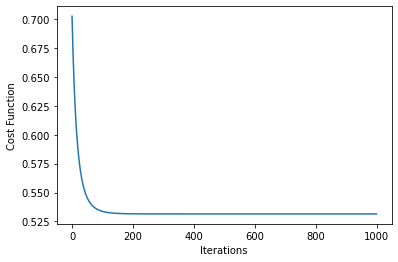

In [127]:
plt.plot(np.arange(iterations), errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
print(errors)

In [128]:
def feature_scaling_predict(column):
    
    x_mean = np.mean(column)
    x_std = np.std(column)
    return (column - x_mean) / x_std

In [129]:
values = data_copy[['trestbps', 'chol', 'thalach', 'oldpeak']]
values = np.concatenate((np.ones((m,1)),values), axis=1) 
print(theta)
print(values)
predicted = np.dot(values, np.transpose(theta))
for i in range(len(predicted)):
    if predicted[i][0] > 0:
        predicted[i][0] = 1.0
    else:
        predicted[i][0] = 0.0
data_original['predicted'] = predicted
print(data_original)

[[ 0.17620783 -0.19758783 -0.16187203  0.79467046 -0.82710734]]
[[ 1.          0.76395577 -0.25633371  0.01544279  1.08733806]
 [ 1.         -0.09273778  0.07219949  1.63347147  2.12257273]
 [ 1.         -0.09273778 -0.81677269  0.97751389  0.31091206]
 ...
 [ 1.          0.70684287 -1.029353   -0.37813176  2.03630317]
 [ 1.         -0.09273778 -2.2275329  -1.51512489  0.13837295]
 [ 1.         -0.09273778 -0.19835726  1.0649749  -0.89686172]]
     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
age                                                                          
63     1   3       145   233    1        0      150      0      2.3      0   
37     1   2       130   250    0        1      187      0      3.5      0   
41     0   1       130   204    0        0      172      0      1.4      2   
56     1   1       120   236    0        1      178      0      0.8      2   
57     0   0       120   354    0        1      163      1      0.6      2   
..   .